## Header


In [2]:
import numpy as np
import matplotlib.pyplot as plt

inputs = np.array([
    [1,1,1],
    [1,0,1],
    [0,1,1],
    [0,0,1]])


expectedResults = np.array([[0],[1],[1],[0]])

graph_index = 0




## Common functions

In [4]:

def createWeigth(elements, neuronsInHiddenLayers):
    return [
        np.random.random((len(elements[0]),neuronsInHiddenLayers)),
        np.random.random((neuronsInHiddenLayers,1))
    ]
    
def sigmoid(x,derivative=False):
    if (derivative):
        return x * (1-x)
    return 1 /(1+ np.exp(-x))

def tanh(x, derivative=False):
    if (derivative):
        return 1.0 - np.tanh(x)**2
    return np.tanh(x)

def feedforward(inputValues, activationFunction, weight1, weight2):
    w_sum1 = np.dot(inputValues, weight1)
    res_1 = activationFunction(w_sum1)

    w_sum2 = np.dot(res_1, weight2)
    res_2  = activationFunction(w_sum2)

    return (res_1, res_2)


First method

In [9]:

def brainPower(inputs, wl0l1, wl1l2, learning_rate, activationFunction, iteration):
    errors = []
    for _ in range(iteration):
        res1, res2 = feedforward(inputs, activationFunction, wl0l1, wl1l2)
        delta_error = res2-expectedResults

        error = ((1/2)*(np.power((delta_error),2))) #??
        
        #backfeeding the error
        ## output to hidden
        delta_sum = activationFunction(res2, True)
        delta__weigth = res1
        delta_output_layer = np.dot(delta__weigth.T,(delta_error*delta_sum))
        
        #hidden to inputs
        delta_act_hidden = np.dot(delta_error * delta_sum, wl1l2.T)
        delta_sum_hidden = activationFunction(res1, True)
        delta_weight_Layer1 = inputs
        delta_hidden_layer  = np.dot(delta_weight_Layer1.T, delta_act_hidden*delta_sum_hidden)
        
        wl0l1 = wl0l1 - learning_rate * delta_hidden_layer
        wl1l2 = wl1l2 - learning_rate * delta_output_layer
        
        res1, res2 = feedforward(inputs, activationFunction, wl0l1, wl1l2)
        
        errors.append(sum(error))
        
    return errors

Second method with momemtum 

In [10]:


def brainPowerMomentum(inputs, wl0l1, wl1l2, learning_rate, activationFunction, iteration, momentum):
    previousDeltaHL, previousDeltaOL = 0, 0
    errors = []
    for _ in range(iteration):
        res1, res2 = feedforward(inputs, activationFunction, wl0l1, wl1l2)
        delta_error = res2-expectedResults
        error = ((1/2)*(np.power((delta_error),2))) 
   
        
        #backfeeding the error
        ## output to hidden
        delta_sum = activationFunction(res2, True)
        delta__weigth = res1
        delta_output_layer = np.dot(delta__weigth.T,(delta_error*delta_sum))
        
        #hidden to inputs
        delta_act_hidden = np.dot(delta_error * delta_sum, wl1l2.T)
        delta_sum_hidden = activationFunction(res1, True)
        delta_weight_Layer1 = inputs
        delta_hidden_layer  = np.dot(delta_weight_Layer1.T, delta_act_hidden*delta_sum_hidden)
        
        previousDeltaHL = (learning_rate * delta_hidden_layer + previousDeltaHL * momentum)
        previousDeltaOL = (learning_rate * delta_output_layer + previousDeltaOL * momentum)
        
        wl0l1 = wl0l1 - previousDeltaHL
        wl1l2 = wl1l2 - previousDeltaOL
                

        errors.append(sum(error))
    return errors



Test method

In [11]:

def test(learning_rate, iteration, hiddenLayerSize, inputs):
    errors = []
    witoh, whtoout = createWeigth(inputs, hiddenLayerSize)
    
    error = brainPower(inputs, witoh, whtoout, learning_rate,sigmoid, iteration)
    errors.append(error)
    
    
    error = brainPower(inputs, witoh, whtoout, learning_rate,tanh, iteration)
    errors.append(error)
    
    error = brainPowerMomentum(inputs, witoh, whtoout, learning_rate,sigmoid, iteration,0.1)
    errors.append(error)
    
    error = brainPowerMomentum(inputs, witoh, whtoout, learning_rate,tanh, iteration,0.1)
    errors.append(error)
    
    global graph_index
    
    plt.figure(graph_index)
    graph_index = graph_index + 1
    
    for i in range(0,len(errors)):
        function = "{name}".format(name="sigmoid" if i&1==0 else "tanh") 
        method = "{func}".format(func="Backfeeding" if i<2 else "Momemtum" )
        
        plt.plot(errors[i], label="{}) {} {}".format(i, function, method))
        
    plt.legend(loc='upper right',title="Lr {} Loop {} #neuronHL {}".format(learning_rate, iteration,hiddenLayerSize ))


'\ntest(5,500,5,inputs)\ntest(8,500,5,inputs)\n\ntest(0.5,300,2,inputs)\ntest(0.5,300,2,inputs)\ntest(0.75,300,2,inputs)\ntest(1,300,2,inputs)\n\ntest(0.5,300,4,inputs)\ntest(0.5,300,4,inputs)\ntest(0.75,300,4,inputs)\ntest(1,300,4,inputs)\n\n\ntest(0.5,300,7,inputs)\ntest(0.5,300,7,inputs)\ntest(0.75,300,7,inputs)\ntest(1,300,7,inputs)\n'

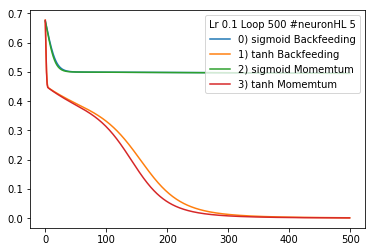

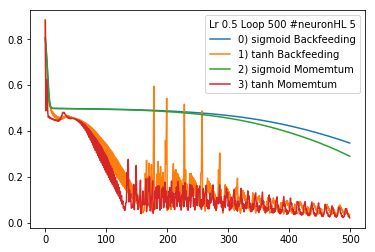

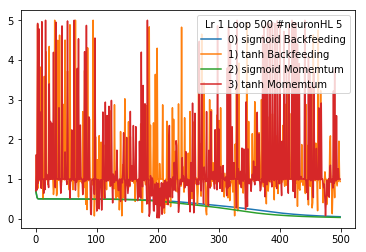

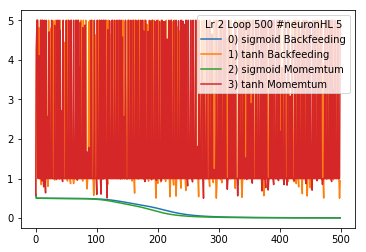

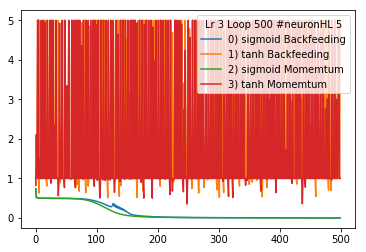

In [12]:

test(0.1,500,5,inputs)
##test(0.25,500,5,inputs)
##test(0.33,500,5,inputs)
test(0.5,500,5,inputs)
##test(0.66,500,5,inputs)
##test(0.75,500,5,inputs)

test(1,500,5,inputs)

test(2,500,5,inputs)
test(3,500,5,inputs)
"""
test(5,500,5,inputs)
test(8,500,5,inputs)

test(0.5,300,2,inputs)
test(0.5,300,2,inputs)
test(0.75,300,2,inputs)
test(1,300,2,inputs)

test(0.5,300,4,inputs)
test(0.5,300,4,inputs)
test(0.75,300,4,inputs)
test(1,300,4,inputs)


test(0.5,300,7,inputs)
test(0.5,300,7,inputs)
test(0.75,300,7,inputs)
test(1,300,7,inputs)
"""